In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('DataUnderstanding').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/11 03:42:17 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# Importing data which has a header. Schema is automatically configured.
df_la_accidents = spark.read.csv('LA_Accidents.csv', header=True, inferSchema=True)

# Let's see the data. You'll notice nulls.
df_la_accidents.show()

23/10/11 03:42:35 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-------+--------+-------------------+-------------------+------------------+-----------+-------+-------+------------+--------------------+------------------+-----------+-----------+-----+----------+-------+----------+------------+-------------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
|     ID| Source|Severity|         Start_Time|           End_Time|         Start_Lat|  Start_Lng|End_Lat|End_Lng|Distance(mi)|         Description|            Street|       City|     County|State|   Zipcode|Country|  Timezone|Airport_Code|  Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Amenity| Bump

In [3]:
df_la_accidents.columns

['ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [4]:
df_la_accidents.select('ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 ).show()

+-------+-------+--------+-------------------+-------------------+------------------+-----------+-------+-------+------------+
|     ID| Source|Severity|         Start_Time|           End_Time|         Start_Lat|  Start_Lng|End_Lat|End_Lng|Distance(mi)|
+-------+-------+--------+-------------------+-------------------+------------------+-----------+-------+-------+------------+
|A-42867|Source2|       2|2016-06-21 10:46:30|2016-06-21 11:27:00|         34.078926| -118.28904|   null|   null|         0.0|
|A-42868|Source2|       3|2016-06-21 10:49:21|2016-06-21 11:34:21|         34.091179|-118.239471|   null|   null|         0.0|
|A-42882|Source2|       3|2016-06-21 10:51:45|2016-06-21 11:36:45|         34.037239|-118.309074|   null|   null|         0.0|
|A-42884|Source2|       3|2016-06-21 10:56:24|2016-06-21 11:34:00|         34.027458| -118.27449|   null|   null|         0.0|
|A-42899|Source2|       3|2016-06-21 11:30:46|2016-06-21 12:00:46|         33.947544|-118.279434|   null|   nul

In [5]:
df_la_accidents.select('Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code').show()

+--------------------+------------------+-----------+-----------+-----+----------+-------+----------+------------+
|         Description|            Street|       City|     County|State|   Zipcode|Country|  Timezone|Airport_Code|
+--------------------+------------------+-----------+-----------+-----+----------+-------+----------+------------+
|Right hand should...|          US-101 N|Los Angeles|Los Angeles|   CA|     90004|     US|US/Pacific|        KCQT|
|Accident on I-5 N...|Golden State Fwy S|Los Angeles|Los Angeles|   CA|     90031|     US|US/Pacific|        KCQT|
|Accident on I-10 ...|            I-10 W|Los Angeles|Los Angeles|   CA|     90018|     US|US/Pacific|        KCQT|
|Accident on I-110...|      Harbor Fwy N|Los Angeles|Los Angeles|   CA|     90007|     US|US/Pacific|        KCQT|
|Right hand should...|      Harbor Fwy N|Los Angeles|Los Angeles|   CA|     90003|     US|US/Pacific|        KHHR|
|#4 &amp; #5 lane ...|            I-10 W|Los Angeles|Los Angeles|   CA|     9001

In [6]:
df_la_accidents.select('Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 ).show()

+-------------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+
|  Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|
+-------------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+
|2016-06-21 10:47:00|          82.9|         null|       47.0|       29.95|          10.0|      Variable|            4.6|
|2016-06-21 10:47:00|          82.9|         null|       47.0|       29.95|          10.0|      Variable|            4.6|
|2016-06-21 10:47:00|          82.9|         null|       47.0|       29.95|          10.0|      Variable|            4.6|
|2016-06-21 10:47:00|          82.9|         null|       47.0|       29.95|          10.0|      Variable|            4.6|
|2016-06-21 11:53:00|          80.1|         null|       52.0|       29.96|          10.0|           ESE|            9.2|
|2016-06-21 11:51:00|   

In [7]:
df_la_accidents.select('Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 ).show()

+-----------------+-----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+
|Precipitation(in)|Weather_Condition|Amenity| Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station| Stop|
+-----------------+-----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+
|             null|            Clear|  false|false|   false|   false|    true|  false|  false|     false|  false|false|
|             null|            Clear|  false|false|   false|   false|   false|  false|  false|     false|  false|false|
|             null|            Clear|  false|false|   false|   false|   false|  false|  false|     false|   true|false|
|             null|            Clear|  false|false|   false|   false|   false|  false|  false|     false|  false|false|
|             null|            Clear|  false|false|   false|   false|   false|  false|  false|     false|  false|false|
|             null|            Clear|  f

In [8]:
df_la_accidents.select('Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight'
 ).show()

+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
|Traffic_Calming|Traffic_Signal|Turning_Loop|Sunrise_Sunset|Civil_Twilight|Nautical_Twilight|Astronomical_Twilight|
+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
|          false|         false|       false|           Day|           Day|              Day|                  Day|
|          false|         false|       false|           Day|           Day|              Day|                  Day|
|          false|         false|       false|           Day|           Day|              Day|                  Day|
|          false|         false|       false|           Day|           Day|              Day|                  Day|
|          false|         false|       false|           Day|           Day|              Day|                  Day|
|          false|         false|       false|           Day|           D

In [9]:
df_la_accidents.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Severity: integer (nullable = true)
 |-- Start_Time: string (nullable = true)
 |-- End_Time: string (nullable = true)
 |-- Start_Lat: double (nullable = true)
 |-- Start_Lng: double (nullable = true)
 |-- End_Lat: double (nullable = true)
 |-- End_Lng: double (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Description: string (nullable = true)
 |-- Street: string (nullable = true)
 |-- City: string (nullable = true)
 |-- County: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Zipcode: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Timezone: string (nullable = true)
 |-- Airport_Code: string (nullable = true)
 |-- Weather_Timestamp: string (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Wind_Chill(F): double (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Pressure(in): double (nullable = true)
 |-- Visibility

In [10]:
df_la_accidents.select('Severity',
                       'Distance(mi)',
                       'Pressure(in)',
                       'Wind_Speed(mph)',
                       'Humidity(%)',
 ).describe().show()

+-------+-------------------+-------------------+-------------------+------------------+------------------+
|summary|           Severity|       Distance(mi)|       Pressure(in)|   Wind_Speed(mph)|       Humidity(%)|
+-------+-------------------+-------------------+-------------------+------------------+------------------+
|  count|             156491|             156491|             155526|            132502|            155311|
|   mean| 2.2335469771424554|0.49391356048971535| 29.852869938146554| 3.922570225355004| 60.53426994868361|
| stddev|0.44078254527232025| 1.4220547745124537|0.16569115429575532|3.9456881964510258|21.101800365755167|
|    min|                  1|                0.0|              28.81|               0.0|               3.0|
|    max|                  4|            137.618|               30.5|              36.8|             100.0|
+-------+-------------------+-------------------+-------------------+------------------+------------------+



In [11]:
df_la_accidents.select('Start_Lat',
                       'Start_Lng',
                       'End_Lat',
                       'End_Lng',   
                       
 ).describe().show()

+-------+--------------------+-------------------+-------------------+-------------------+
|summary|           Start_Lat|          Start_Lng|            End_Lat|            End_Lng|
+-------+--------------------+-------------------+-------------------+-------------------+
|  count|              156491|             156491|              92976|              92976|
|   mean|  34.030332390763895|-118.27540449058313|  34.02830972989527|-118.27302750680774|
| stddev|0.055829780872852106|0.08078394743985735|0.05674997042149668|0.08250259601862651|
|    min|           33.901898|        -118.502785|          33.834274|         -120.39601|
|    max|            34.15829|        -118.121279|            34.8654|        -117.830959|
+-------+--------------------+-------------------+-------------------+-------------------+



In [12]:
df_la_accidents.select( 'Visibility(mi)',
                       'Precipitation(in)',
                       'Temperature(F)',
                       'Wind_Chill(F)'                     
 ).describe().show()

+-------+------------------+--------------------+-----------------+-----------------+
|summary|    Visibility(mi)|   Precipitation(in)|   Temperature(F)|    Wind_Chill(F)|
+-------+------------------+--------------------+-----------------+-----------------+
|  count|            155807|              109020|           155386|           104427|
|   mean| 9.099849878375176|0.003434507429829328| 65.6553846549885|64.92501173068267|
| stddev|1.9966295666733327|  0.0233522990863638|9.415541441172108|9.538574782508734|
|    min|               0.0|                 0.0|             37.9|             37.0|
|    max|              10.0|                0.62|            106.0|            106.0|
+-------+------------------+--------------------+-----------------+-----------------+



In [ ]:
df_la_accidents.select().describe().show()

In [4]:
from pyspark.sql.functions import col, sum
null_statistics = df_la_accidents.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_la_accidents.columns])
null_statistics.show()

+---+------+--------+----------+--------+---------+---------+-------+-------+------------+-----------+------+----+------+-----+-------+-------+--------+------------+-----------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+----+--------+--------+--------+-------+-------+----------+-------+----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
| ID|Source|Severity|Start_Time|End_Time|Start_Lat|Start_Lng|End_Lat|End_Lng|Distance(mi)|Description|Street|City|County|State|Zipcode|Country|Timezone|Airport_Code|Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Amenity|Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station|Stop|Traffic_Calming|Traffic_Signal|Turning_Loop|Sunrise_Sunset|Civil_Twilight|Nautical_Twil

In [5]:
for column_name in null_statistics.columns:
    column_data = null_statistics.select(column_name).rdd.flatMap(lambda x: x).collect()
    print(f"Column: {column_name}, Data: {column_data}")

Column: ID, Data: [0]


Column: Source, Data: [0]


Column: Severity, Data: [0]


Column: Start_Time, Data: [0]


Column: End_Time, Data: [0]


Column: Start_Lat, Data: [0]


Column: Start_Lng, Data: [0]
Column: End_Lat, Data: [63515]
Column: End_Lng, Data: [63515]


Column: Distance(mi), Data: [0]
Column: Description, Data: [1]
Column: Street, Data: [69]
Column: City, Data: [0]


Column: County, Data: [0]


Column: State, Data: [0]


Column: Zipcode, Data: [0]


Column: Country, Data: [0]


Column: Timezone, Data: [0]
Column: Airport_Code, Data: [1]
Column: Weather_Timestamp, Data: [470]
Column: Temperature(F), Data: [1105]
Column: Wind_Chill(F), Data: [52064]
Column: Humidity(%), Data: [1180]
Column: Pressure(in), Data: [965]


Column: Visibility(mi), Data: [684]
Column: Wind_Direction, Data: [2431]
Column: Wind_Speed(mph), Data: [23989]


Column: Precipitation(in), Data: [47471]
Column: Weather_Condition, Data: [650]


Column: Amenity, Data: [0]


Column: Bump, Data: [0]
Column: Crossing, Data: [0]
Column: Give_Way, Data: [0]
Column: Junction, Data: [0]
Column: No_Exit, Data: [0]
Column: Railway, Data: [0]
Column: Roundabout, Data: [0]
Column: Station, Data: [0]
Column: Stop, Data: [0]
Column: Traffic_Calming, Data: [0]
Column: Traffic_Signal, Data: [0]


Column: Turning_Loop, Data: [0]


Column: Sunrise_Sunset, Data: [0]
Column: Civil_Twilight, Data: [0]
Column: Nautical_Twilight, Data: [0]
Column: Astronomical_Twilight, Data: [0]


Column: ID, Data: [0]  
Column: Source, Data: [0]  
Column: Severity, Data: [0]  
Column: Start_Time, Data: [0]  
Column: End_Time, Data: [0]  
Column: Start_Lat, Data: [0]  
Column: Start_Lng, Data: [0]  
Column: End_Lat, Data: [63515]  
Column: End_Lng, Data: [63515]  
Column: Distance(mi), Data: [0]  
Column: Description, Data: [1]  
Column: Street, Data: [69]  
Column: City, Data: [0]  
Column: County, Data: [0]  
Column: State, Data: [0]  
Column: Zipcode, Data: [0]  
Column: Country, Data: [0]  
Column: Timezone, Data: [0]  
Column: Airport_Code, Data: [1]  
Column: Weather_Timestamp, Data: [470]  
Column: Temperature(F), Data: [1105]  
Column: Wind_Chill(F), Data: [52064]  
Column: Humidity(%), Data: [1180]  
Column: Pressure(in), Data: [965]  
Column: Visibility(mi), Data: [684]  
Column: Wind_Direction, Data: [2431]  
Column: Wind_Speed(mph), Data: [23989]  
Column: Precipitation(in), Data: [47471]  
Column: Weather_Condition, Data: [650]  
Column: Amenity, Data: [0]  
Column: Bump, Data: [0]  
Column: Crossing, Data: [0]  
Column: Give_Way, Data: [0]  
Column: Junction, Data: [0]  
Column: No_Exit, Data: [0]  
Column: Railway, Data: [0]  
Column: Roundabout, Data: [0]  
Column: Station, Data: [0]  
Column: Stop, Data: [0]  
Column: Traffic_Calming, Data: [0]  
Column: Traffic_Signal, Data: [0]  
Column: Turning_Loop, Data: [0]                                                                                 
Column: Sunrise_Sunset, Data: [0]  
Column: Civil_Twilight, Data: [0]  
Column: Nautical_Twilight, Data: [0]  
Column: Astronomical_Twilight, Data: [0]  

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

la_traffic_df = df_la_accidents.toPandas()


['Start_Lat']
0         34.078926
1         34.091179
2         34.037239
3         34.027458
4         33.947544
            ...    
156486    34.036930
156487    34.075790
156488    34.023790
156489    34.070610
156490    34.043650
Name: Start_Lat, Length: 156491, dtype: float64
['Start_Lng']
0        -118.289040
1        -118.239471
2        -118.309074
3        -118.274490
4        -118.279434
             ...    
156486   -118.438770
156487   -118.276680
156488   -118.276390
156489   -118.263910
156490   -118.443730
Name: Start_Lng, Length: 156491, dtype: float64
['End_Lat']
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
156486    34.02559
156487    34.07431
156488    34.02576
156489    34.06974
156490    34.04934
Name: End_Lat, Length: 156491, dtype: float64
['End_Lng']
0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
156486   -118.42918
156487

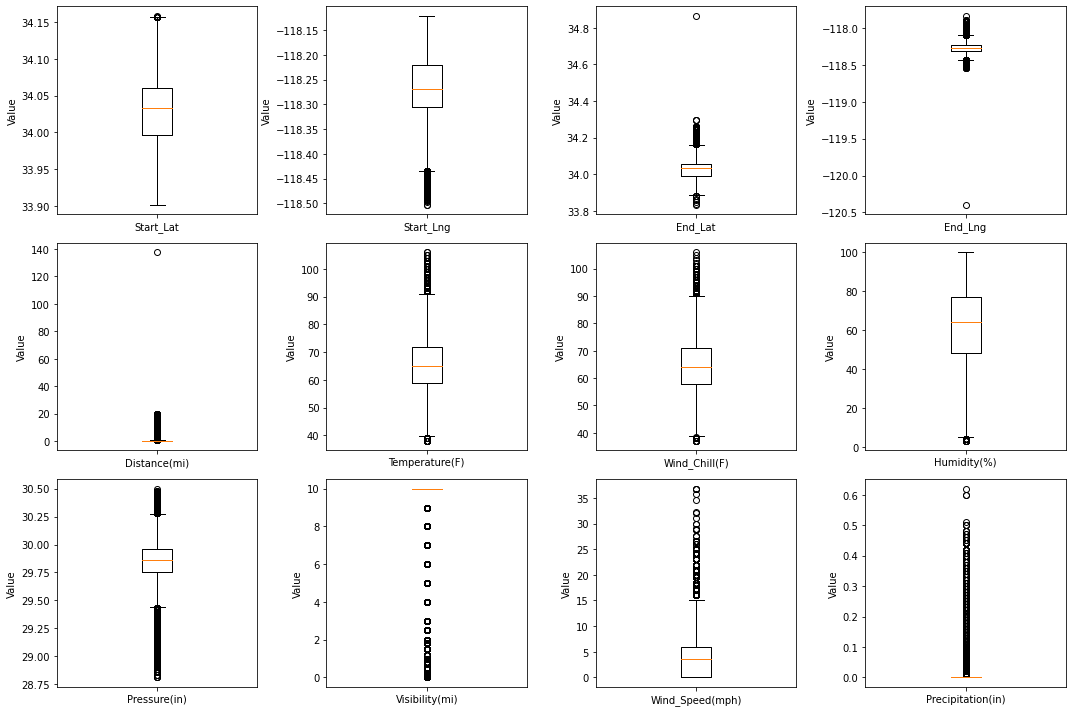

In [5]:
# draw box graph and see outliers
continuous_attributes =  [ 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 
       'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)']
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for i, column in enumerate(continuous_attributes):
    row = i // 4  
    col = i % 4   
    print([column])
    axs[row, col].boxplot(la_traffic_df[la_traffic_df[column].notna()][column], labels=[column])
    print(la_traffic_df[column])
    axs[row, col].set_ylabel('Value')
    # axs[row, col].set_title(f'Box Plot for {column}')
plt.tight_layout()
plt.show()

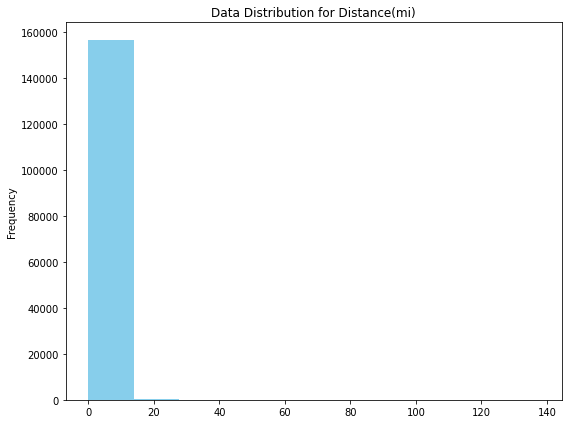

In [6]:
continuous_attributes = ['Distance(mi)']
plt.figure(figsize=(8, 6 * len(continuous_attributes)))
for i in range(0,len(continuous_attributes)):
    column = continuous_attributes[i]
    plt.subplot(len(continuous_attributes), 1, i + 1)  # 创建子图
    ax = plt.gca()
    ax.hist(la_traffic_df[column], color='skyblue')
    # ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Data Distribution for {column}')

plt.tight_layout() 
plt.show()

/tmp/ipykernel_3861/3597685999.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(value_counts.index)


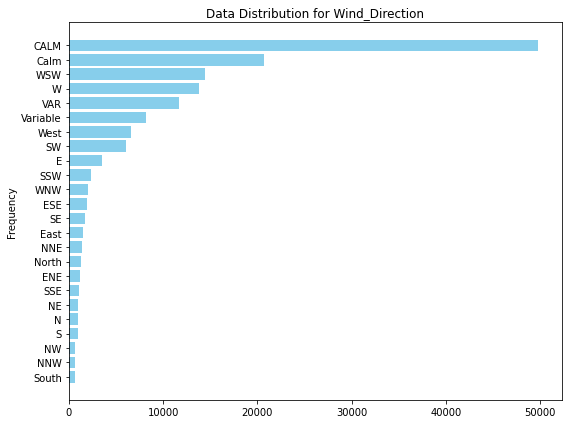

In [7]:

# draw data distribution for Wind_Direction
plt.rcParams['font.size'] = 10

category_attributes = ['Wind_Direction']
plt.figure(figsize=(8, 6 * len(category_attributes)))
for i in range(0,len(category_attributes)):
    column = category_attributes[i]
    plt.subplot(len(category_attributes), 1, i + 1)  # 创建子图
    ax = plt.gca()
    
    value_counts = la_traffic_df[column].value_counts().sort_values(ascending=True)
    ax.barh([str(i) for i in value_counts.index], value_counts.values, color='skyblue')
    # ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Data Distribution for {column}')
    ax.set_yticklabels(value_counts.index)

plt.tight_layout() 
plt.show()
